(1220960, 16)
(1220960, 16)


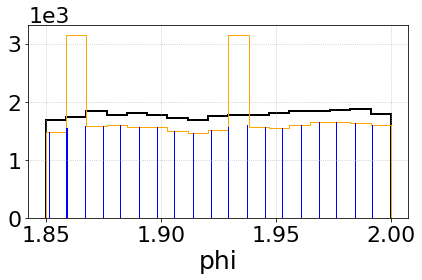

In [10]:

import sys
BIN = '../../'
sys.path.append(BIN)
import utils
import matplotlib.pyplot as plt
from scipy import stats
import my_matplotlib_style as ms

%matplotlib inline

%matplotlib inline
import sys
BIN = '../../'
sys.path.append(BIN)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
#import torch.nn.parallel
import torch.optim as optim
import torch.utils.data
from torch.autograd import Variable

from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

import my_matplotlib_style as ms

from fastai import data_block, basic_train, basic_data
from fastai.callbacks import ActivationStats
import fastai

import matplotlib as mpl
mpl.rc_file(BIN + 'my_matplotlib_rcparams')

from nn_utils import AE_big, AE_3D_200
from utils import plot_activations

from matplotlib.animation import FuncAnimation

%matplotlib inline
from matplotlib import animation, rc
from IPython.display import HTML


# Load data
train = pd.read_pickle(BIN + 'processed_data/aod/uncompressed_all_jets_train.pkl')

trainc = pd.read_pickle(BIN + 'processed_data/aod/compressed_all_jets_train.pkl')



branches = ['pt','eta','phi','m'] + ["ActiveArea4vec_eta", "ActiveArea4vec_m", "ActiveArea4vec_phi", "ActiveArea4vec_pt", "Jvt", "JVFCorr" ,"JvtRpt", "FracSamplingMax", "FracSamplingMaxIndex", "Width", "EMFrac","Timing"]

def getRatio(bin1,bin2):
    # Sanity check
    if len(bin1) != len(bin2):
        print("Cannot make ratio!")
    bins = []
    for b1,b2 in zip(bin1,bin2):
        if b1==0 and b2==0:
            bins.append(0.)
        elif b2==0:
            bins.append(None)
        else:
            bins.append((float(b2)-float(b1))/b1)
    # The ratio can of course be expanded with eg. error
    return bins  

%matplotlib inline

print(train.shape)
print(trainc.shape)

train = train.loc[train['phi'] > 1.85]
trainc = trainc.loc[trainc['phi'] > 1.85]

train = train.loc[train['phi'] < 2]
trainc = trainc.loc[trainc['phi'] < 2]



n_bins = 17
alph = 0.8
#for kk in np.arange(4):
for kk in [2]:
    #plt.figure(kk + 4, figsize=(5,5))
    #fig, axs = plt.subplots(ncols=1,nrows=1,sharex=True,gridspec_kw={'height_ratios': [3, 1]},figsize=(10,6))
    #plt.figure(figsize=(6,6))
    #plt.ticklabel_format(style='sci', axis='x', scilimits=(0,0))
    n_hist_data, bin_edges, _ = plt.hist(train[branches[kk]], color='black', label='Input', alpha=1, bins=n_bins,histtype="step",linewidth=2, density=False)
    n_hist_datac, bin_edges_c, _ = plt.hist(trainc[branches[kk]], color='orange', label='Compressed Input', alpha=1, bins=bin_edges,histtype="step", density=False)
    _, _, _ = plt.hist(trainc[branches[kk]], color='blue', label='Compressed Input', alpha=1, bins=300,histtype="bar", density=False, linewidth=2)
    
    #n_hist_pred, _, _ = plt.hist(pred[:, kk], color=colors[0], label='Output', alpha=alph, bins=bin_edges)
    #plt.suptitle(branches[kk])

    #rat = getRatio(n_hist_data,n_hist_datac)

    #axs[1].step(bin_edges[:-1],rat, color='black',linewidth=1)

    plt.xlabel(branches[kk])
    axs[0].set(ylabel='Number of events')
    ms.sciy()
    #plt.xlim(-5, 10)
    # plt.yscale('log')
    #plt.legend(loc=4)
    fig_name = 'trainforever_hist_%s' % train.columns[kk]
    plt.tight_layout()
    #plt.savefig("floatcompression_overlaidinput_"+branches[kk])
    #plt.show()
    plt.savefig("phidoublequantization.png",dpi=300)
    
    #plt.savefig("binning_peak.png")
    plt.show()